In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("E://LearningAndExploring/Data Science/Data/Google_Stock_Price_train.csv")

In [3]:
data.head() 

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data_open = data['Open']

In [43]:
data_open.shape

(1258,)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc=MinMaxScaler(feature_range=(0,1))

In [8]:
scaled_data=sc.fit_transform([data_open])

In [9]:
scaled_data.shape

(1, 1258)

In [10]:
scaled_data=scaled_data.reshape(1258,1)

In [11]:
scaled_data.shape

(1258, 1)

In [12]:
scaled_data

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [13]:
X_train=[]
y_train=[]

In [14]:
for i in range(60,len(data_open)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

In [15]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [16]:
X_train.shape

(1198, 60)

In [17]:
y_train.shape

(1198,)

In [18]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [19]:
X_train.shape

(1198, 60, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [21]:
model=Sequential() 

In [22]:
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [23]:
model.compile('adam','mse')

In [24]:
model.fit(X_train,y_train,epochs=2,batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2





1198/1198 [==============================] - 14s 12ms/step - loss: 0.0000e+00
Epoch 2/2
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0000e+00


In [31]:
dataset_test=pd.read_csv("E://LearningAndExploring/Data Science/Data/Google_Stock_Price_Test.csv")

In [33]:
real_stock_prices=dataset_test.iloc[:,1:2].values

In [35]:
dataset_total=pd.concat((data['Open'],dataset_test['Open']),axis=0)

In [37]:
dataset_total.shape

(1278,)

In [38]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [39]:
inputs.shape

(80,)

In [40]:
inputs=inputs.reshape(-1,1)

In [41]:
inputs.shape

(80, 1)

In [45]:
inputs=sc.fit_transform(inputs)

In [46]:
X_test=[]

In [50]:
for  i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])

In [51]:
len(X_test)

20

In [52]:
X_test=np.array(X_test)

In [53]:
X_test.shape

(20, 60)

In [54]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [55]:
X_test.shape

(20, 60, 1)

In [56]:
predicted_stock_price=model.predict(X_test)

In [57]:
predicted_stock_price.shape

(20, 1)

In [58]:
predicted_stock_price[0]

array([0.04149037], dtype=float32)

In [59]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [60]:
predicted_stock_price

array([[748.4577 ],
       [748.46063],
       [748.44556],
       [748.4202 ],
       [748.40485],
       [748.4236 ],
       [748.4824 ],
       [748.5714 ],
       [748.6834 ],
       [748.81036],
       [748.9437 ],
       [749.0744 ],
       [749.19604],
       [749.308  ],
       [749.4101 ],
       [749.5255 ],
       [749.6704 ],
       [749.8559 ],
       [750.07153],
       [750.2738 ]], dtype=float32)

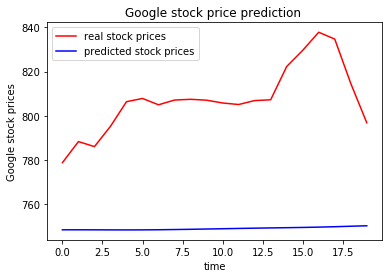

In [63]:
plt.plot(real_stock_prices,color='red',label='real stock prices')
plt.plot(predicted_stock_price,color='blue',label='predicted stock prices')
plt.xlabel('time')
plt.ylabel('Google stock prices')
plt.title('Google stock price prediction ')
plt.legend() 
plt.show() 